In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from helpers import create_cut_and_dummies, get_splits, scatter_plot, random_seed, target_feature


np.random.seed(random_seed)

## 4. Categorization

In [2]:
def check_correctness(train, test, col_name):
    print(train.shape, test.shape)
    print('train and test cols:', all(train.columns == test.columns))
    print(f'{col_name}_missing correctness (train): ', train.shape[0] - train[f'{col_name}_missing'].sum() == train[col_name].notnull().sum())
    print(f'{col_name}_missing correctness (test): ', test.shape[0] - test[f'{col_name}_missing'].sum() == test[col_name].notnull().sum())

def update_datasets_with_categories(train, test, col_name, splits):
    train = create_cut_and_dummies(train, col_name, splits)
    test = create_cut_and_dummies(test, col_name, splits)

    train[f'{col_name}_missing'] = train[col_name].isnull()
    test[f'{col_name}_missing'] = test[col_name].isnull()

    check_correctness(train, test, col_name)

    return (train, test)

def train_tree_and_plot(train, col_name, target_var, max_depth):
    filled_df = train.loc[train[col_name].notnull()]
    print(f'{col_name} filled: {filled_df.shape}')

    clf = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf = clf.fit(np.array(filled_df[col_name]).reshape(-1, 1), np.array(filled_df[target_var]).reshape(-1, 1))

    plt.figure(figsize=(12, 12))
    tree.plot_tree(clf, fontsize=8)
    plt.show()

    return clf

In [3]:
train_df = pd.read_csv(f'../data/barely_processed_train.csv', index_col=0)
test_df = pd.read_csv(f'../data/barely_processed_test.csv', index_col=0)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370736 entries, 442244 to 320663
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   R_Depth     370736 non-null  float64
 1   R_TEMP      370736 non-null  float64
 2   R_SALINITY  354846 non-null  float64
 3   R_SIGMA     354843 non-null  float64
 4   R_SVA       354846 non-null  float64
 5   R_DYNHT     357438 non-null  float64
 6   R_O2        281177 non-null  float64
 7   R_O2Sat     272281 non-null  float64
 8   R_SIO3      154269 non-null  float64
 9   R_PO4       171446 non-null  float64
 10  R_NO3       146157 non-null  float64
 11  R_NO2       145988 non-null  float64
 12  R_NH4       30339 non-null   float64
 13  R_CHLA      102161 non-null  float64
 14  R_PHAEO     102136 non-null  float64
 15  R_PRES      370736 non-null  float64
 16  Lat_Dec     370736 non-null  float64
 17  Lon_Dec     370736 non-null  float64
dtypes: float64(18)
memory usage: 53.7 MB


## Categorization before imputation

Some of the features are missing a lot of values. Also, some features have sort of bimodal distribution and tradintional imputation techniques can not simulate the distribution. We think that in order to preserve the structure of the original data in at least some form, it would be nice to categorize these features, and after that perform imputation. For the missing values a separate "missing" class will be created in each case.

#### R_Depth

Let's categorize this feature.

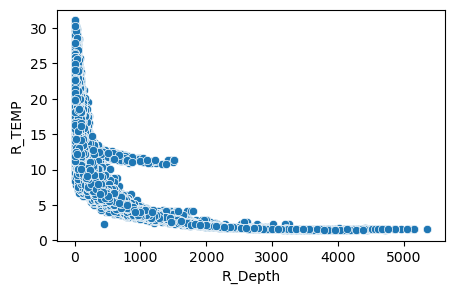

In [5]:
scatter_plot(train_df['R_Depth'], train_df[target_feature])

R_Depth filled: (370736, 18)


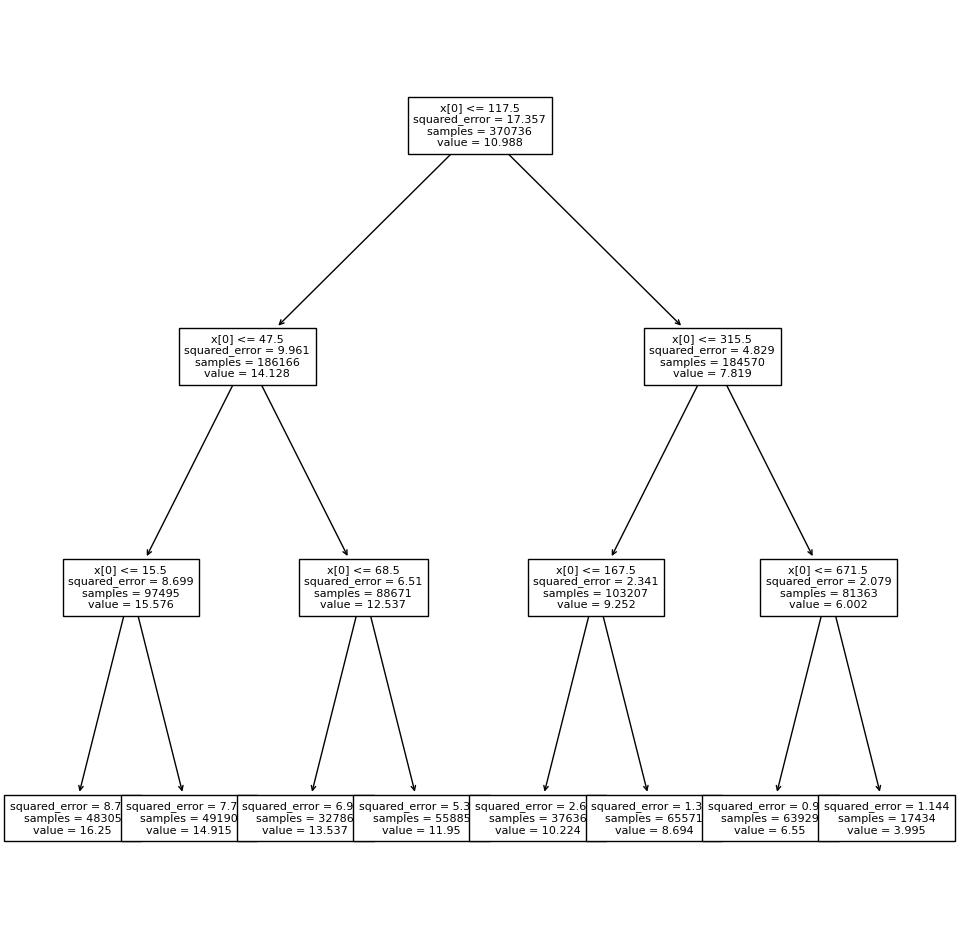

In [6]:
depth_clf = train_tree_and_plot(train_df, 'R_Depth', target_feature, 3)

In [7]:
splits = get_splits(depth_clf)
splits[0] = 0
splits

[0, 15.5, 47.5, 68.5, 117.5, 167.5, 315.5, 671.5, inf]

In [8]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_Depth', splits)

(370736, 27) (158887, 27)
train and test cols: True
R_Depth_missing correctness (train):  True
R_Depth_missing correctness (test):  True


#### R_SIO3

Let's categorize this feature.

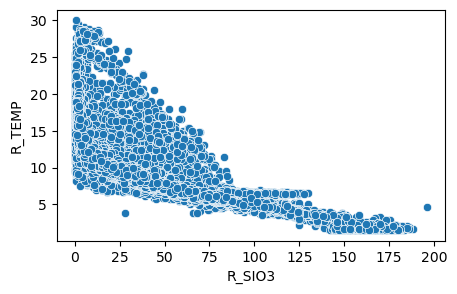

In [9]:
scatter_plot(train_df['R_SIO3'], train_df[target_feature])

R_SIO3 filled: (154269, 27)


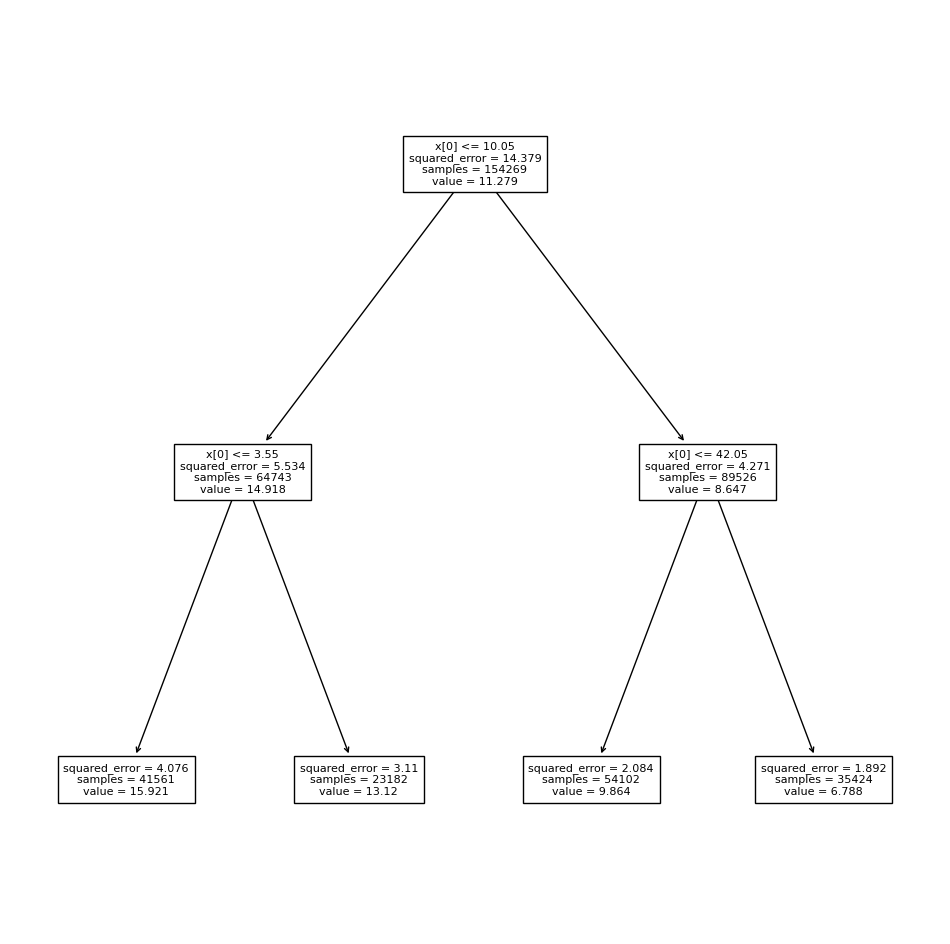

In [10]:
sio3_clf = train_tree_and_plot(train_df, 'R_SIO3', target_feature, 2)

In [11]:
splits = get_splits(sio3_clf)
splits[0] = 0
splits

[0, 3.549999952316284, 10.050000190734863, 42.04999923706055, inf]

In [12]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_SIO3', splits)

(370736, 32) (158887, 32)
train and test cols: True
R_SIO3_missing correctness (train):  True
R_SIO3_missing correctness (test):  True


#### R_PO4

Again, let's classify it.

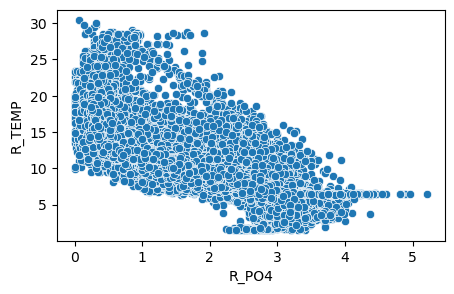

In [13]:
scatter_plot(train_df['R_PO4'], train_df[target_feature])

R_PO4 filled: (171446, 32)


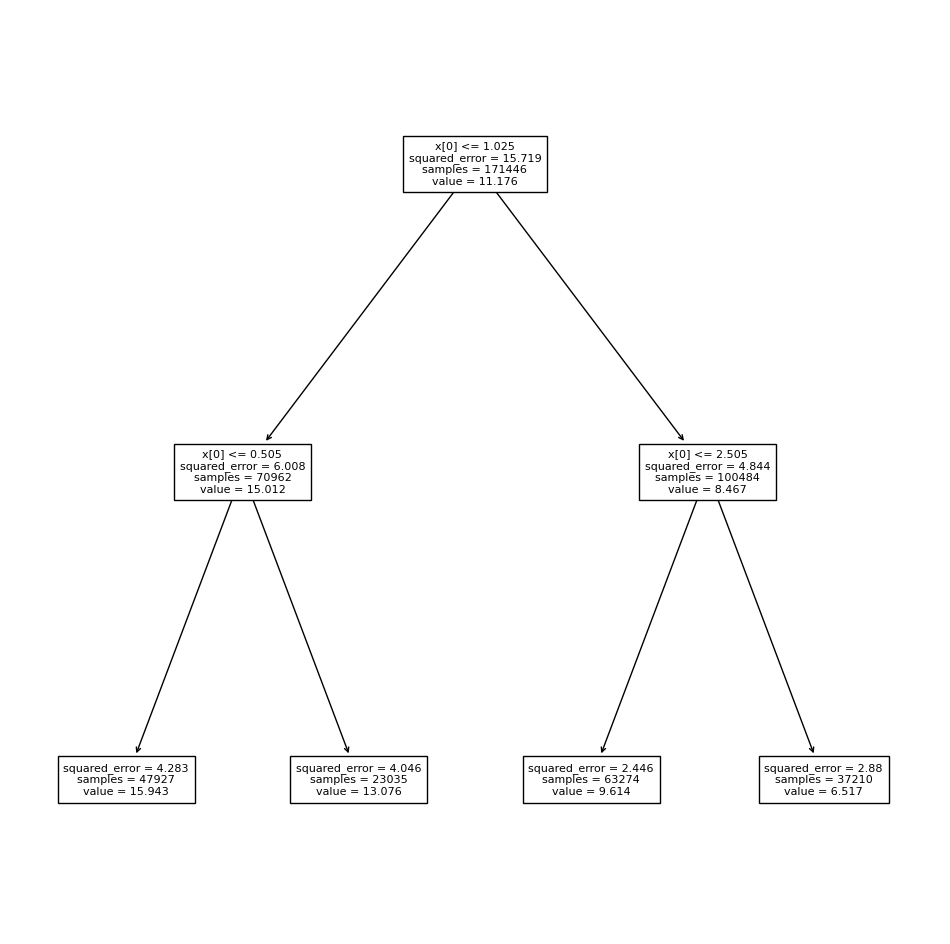

In [14]:
po4_clf = train_tree_and_plot(train_df, 'R_PO4', target_feature, 2)

In [15]:
splits = get_splits(po4_clf)
splits[0] = 0
splits

[0, 0.5049999952316284, 1.024999976158142, 2.5049999952316284, inf]

In [16]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_PO4', splits)

(370736, 37) (158887, 37)
train and test cols: True
R_PO4_missing correctness (train):  True
R_PO4_missing correctness (test):  True


#### R_NO2

Again, let's classify it with a tree.

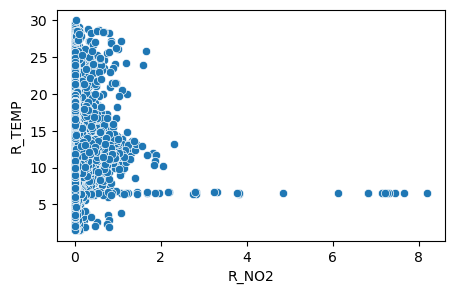

In [17]:
scatter_plot(train_df['R_NO2'], train_df[target_feature])

R_NO2 filled: (145988, 37)


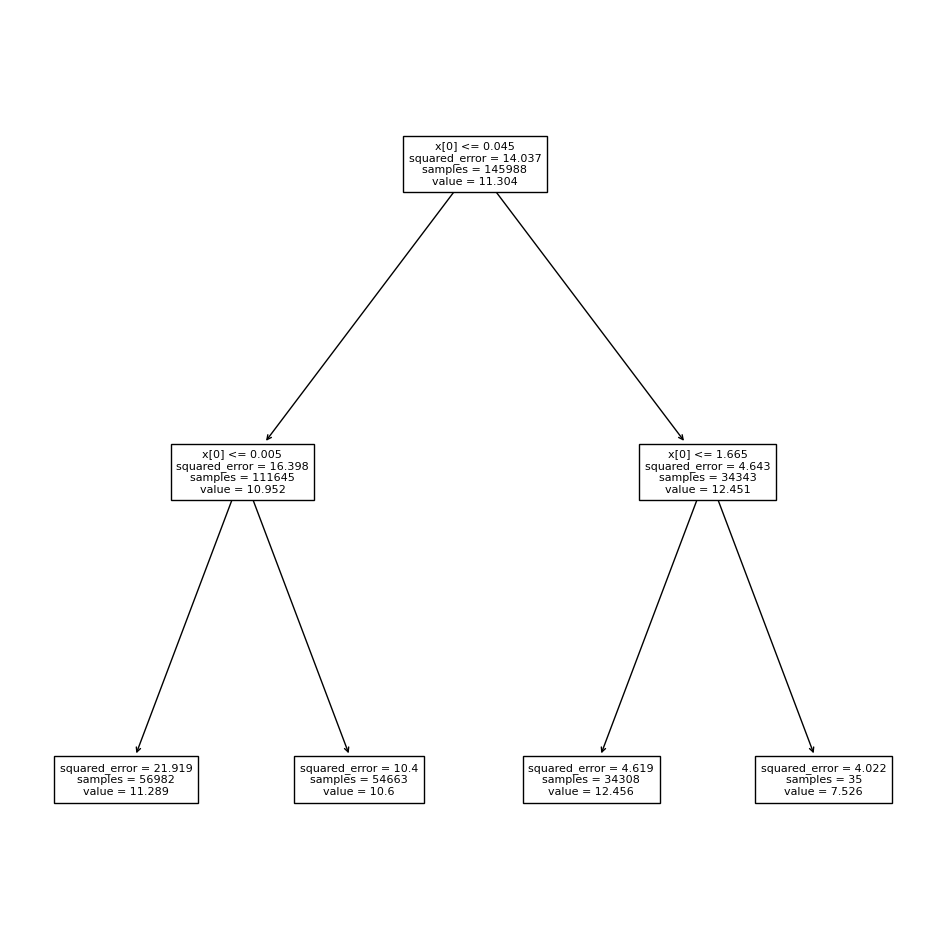

In [18]:
no2_clf = train_tree_and_plot(train_df, 'R_NO2', target_feature, 2)

In [19]:
splits = get_splits(no2_clf)
splits[0] = 0
splits

[0, 0.004999999888241291, 0.044999999925494194, 1.6649999618530273, inf]

In [20]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_NO2', splits)

(370736, 42) (158887, 42)
train and test cols: True
R_NO2_missing correctness (train):  True
R_NO2_missing correctness (test):  True


#### R_NO3

Again, let's classify it with a tree.

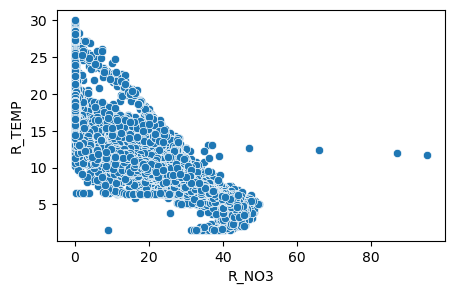

In [21]:
scatter_plot(train_df['R_NO3'], train_df[target_feature])

R_NO3 filled: (146157, 42)


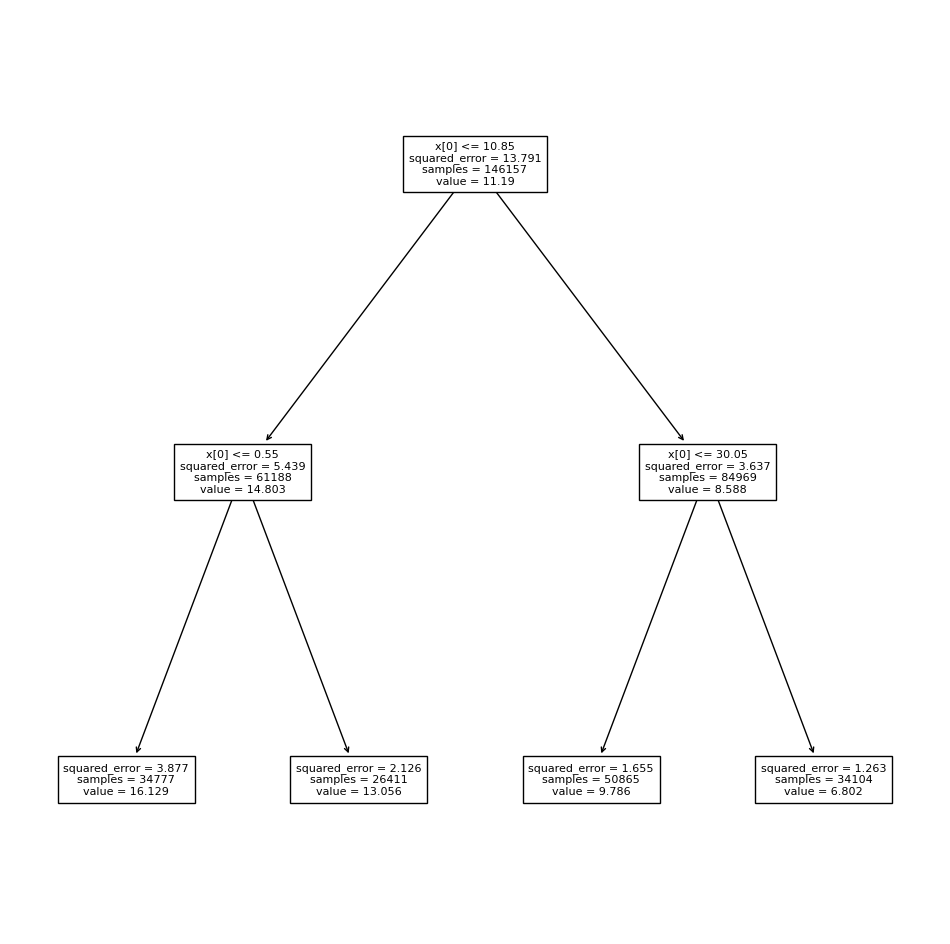

In [22]:
no3_clf = train_tree_and_plot(train_df, 'R_NO3', target_feature, 2)

In [23]:
splits = get_splits(no3_clf)
splits[0] = 0
splits

[0, 0.550000011920929, 10.849999904632568, 30.050000190734863, inf]

In [24]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_NO3', splits)

(370736, 47) (158887, 47)
train and test cols: True
R_NO3_missing correctness (train):  True
R_NO3_missing correctness (test):  True


#### R_NH4

Again, let's classify it with a tree.

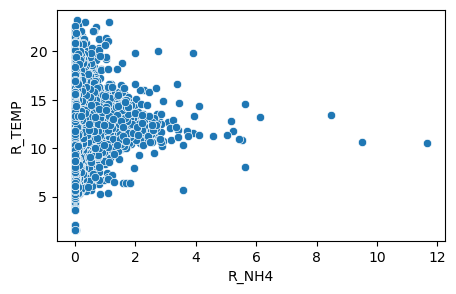

In [25]:
scatter_plot(train_df['R_NH4'], train_df[target_feature])

R_NH4 filled: (30339, 47)


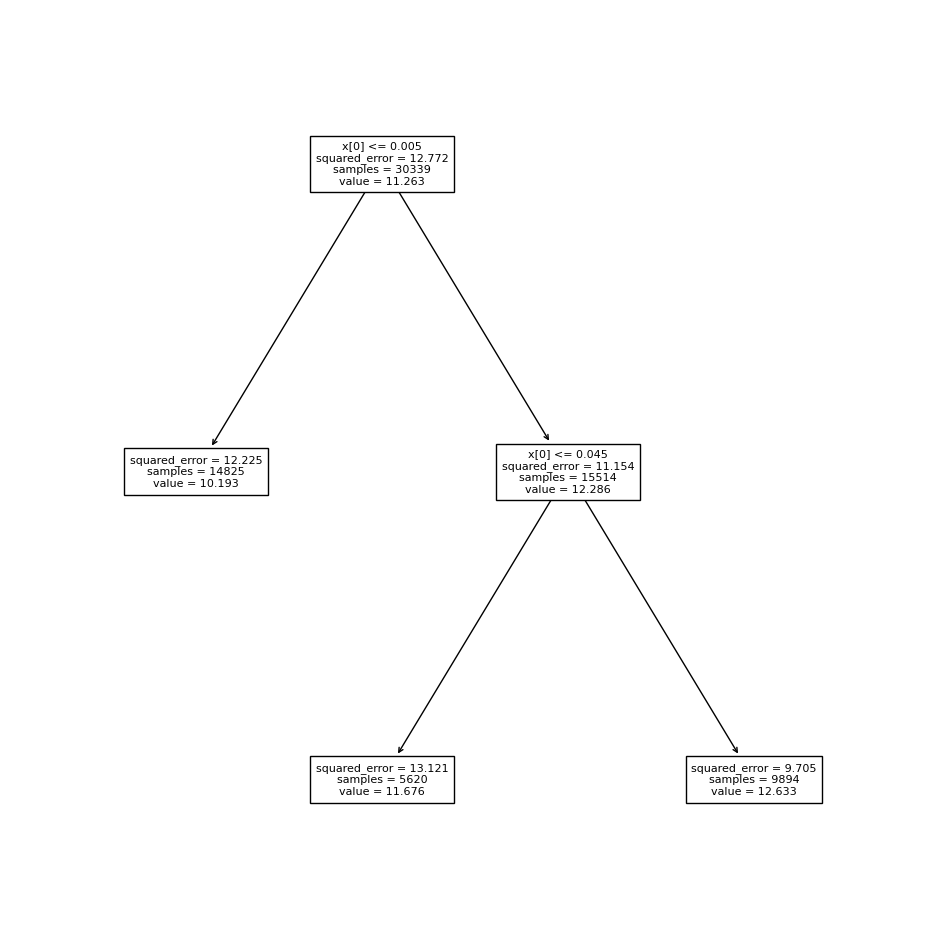

In [26]:
nh4_clf = train_tree_and_plot(train_df, 'R_NH4', target_feature, 2)

In [27]:
splits = get_splits(nh4_clf)
splits[0] = 0
splits

[0, 0.004999999888241291, 0.044999999925494194, inf]

In [28]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_NH4', splits)

(370736, 51) (158887, 51)
train and test cols: True
R_NH4_missing correctness (train):  True
R_NH4_missing correctness (test):  True


#### R_CHLA

Again, let's classify it with a tree.

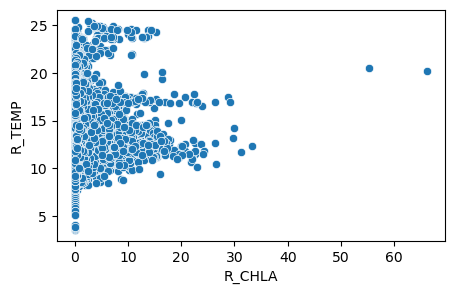

In [29]:
scatter_plot(train_df['R_CHLA'], train_df[target_feature])

R_CHLA filled: (102161, 51)


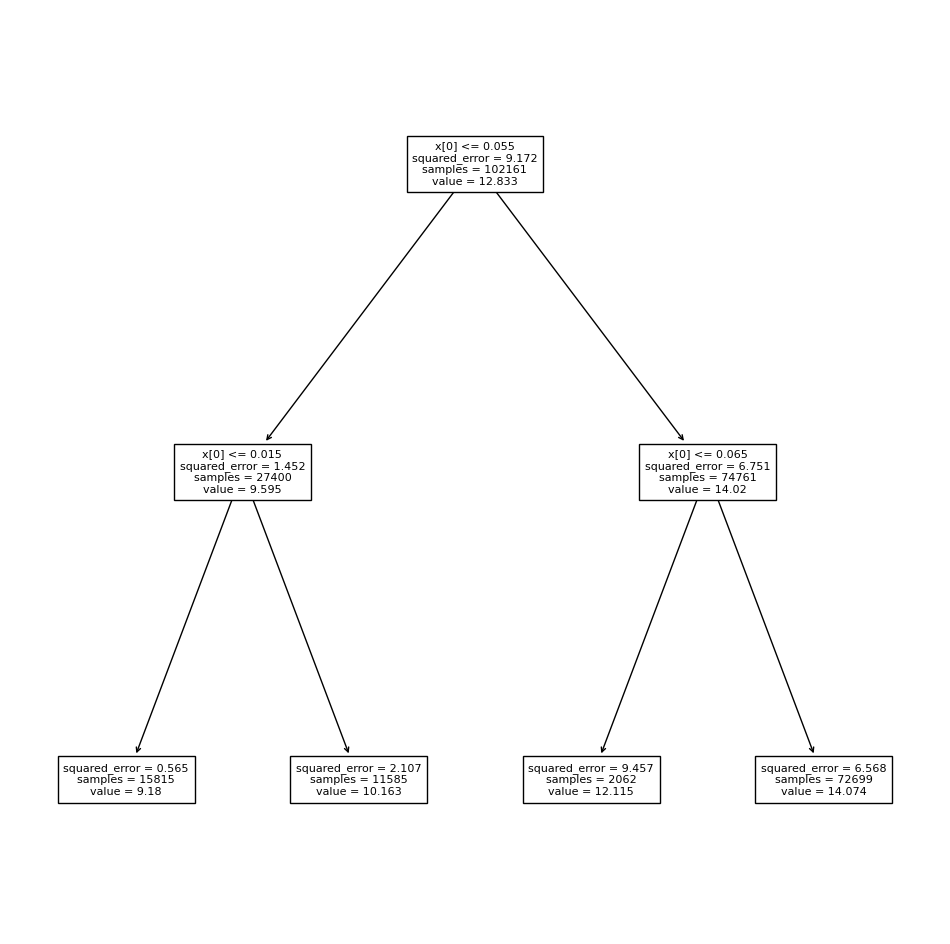

In [30]:
chla_clf = train_tree_and_plot(train_df, 'R_CHLA', target_feature, 2)

In [31]:
splits = get_splits(chla_clf)
splits[0] = 0
splits

[0, 0.014999999664723873, 0.054999999701976776, 0.06499999947845936, inf]

In [32]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_CHLA', splits)

(370736, 56) (158887, 56)
train and test cols: True
R_CHLA_missing correctness (train):  True
R_CHLA_missing correctness (test):  True


#### R_PHAEO

Again, let's classify it with a tree.

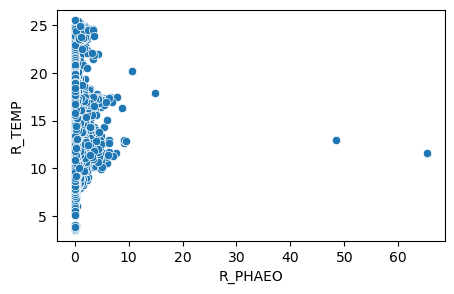

In [33]:
scatter_plot(train_df['R_PHAEO'], train_df[target_feature])

R_PHAEO filled: (102136, 56)


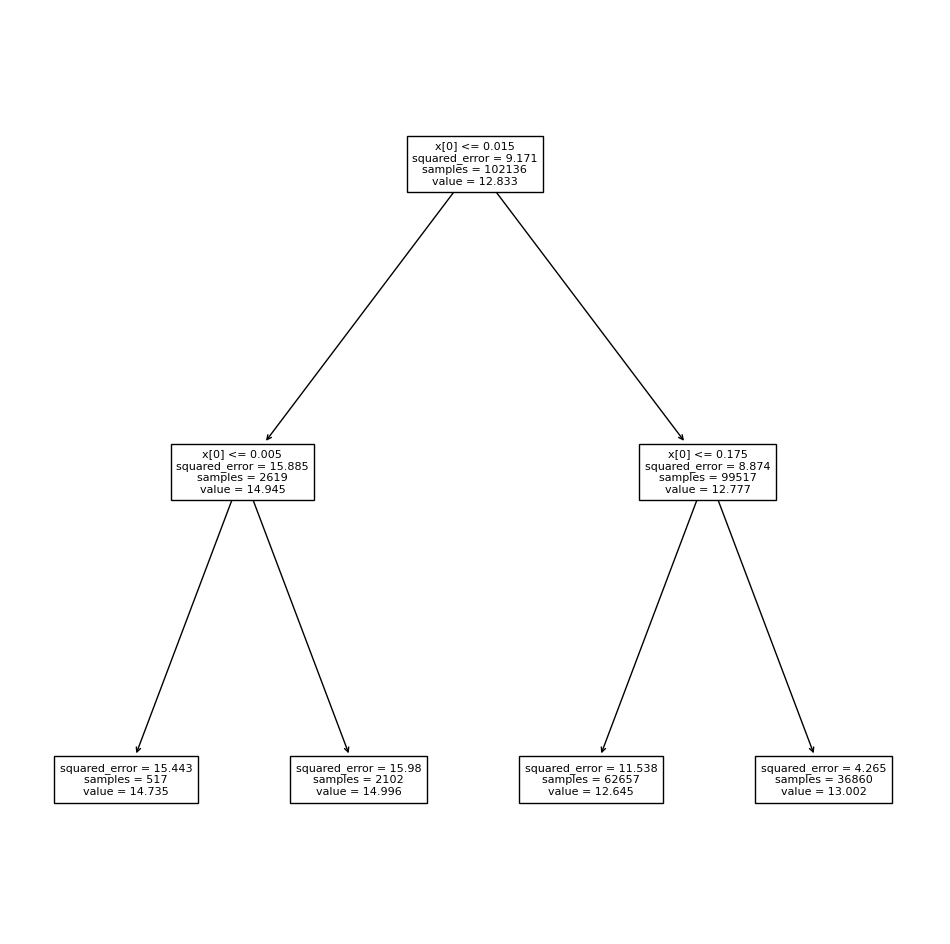

In [34]:
phaeo_clf = train_tree_and_plot(train_df, 'R_PHAEO', target_feature, 2)

In [35]:
splits = get_splits(phaeo_clf)
splits[0] = 0
splits

[0, 0.004999999888241291, 0.014999999664723873, 0.17500000447034836, inf]

In [36]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_PHAEO', splits)

(370736, 61) (158887, 61)
train and test cols: True
R_PHAEO_missing correctness (train):  True
R_PHAEO_missing correctness (test):  True


#### R_PRES

Again, let's classify it with a tree.

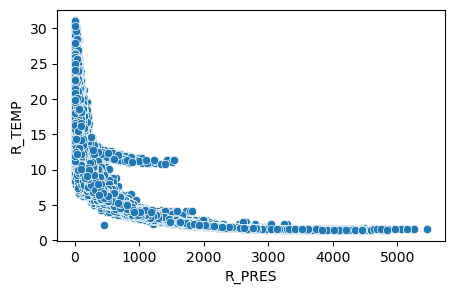

In [37]:
scatter_plot(train_df['R_PRES'], train_df[target_feature])

R_PRES filled: (370736, 61)


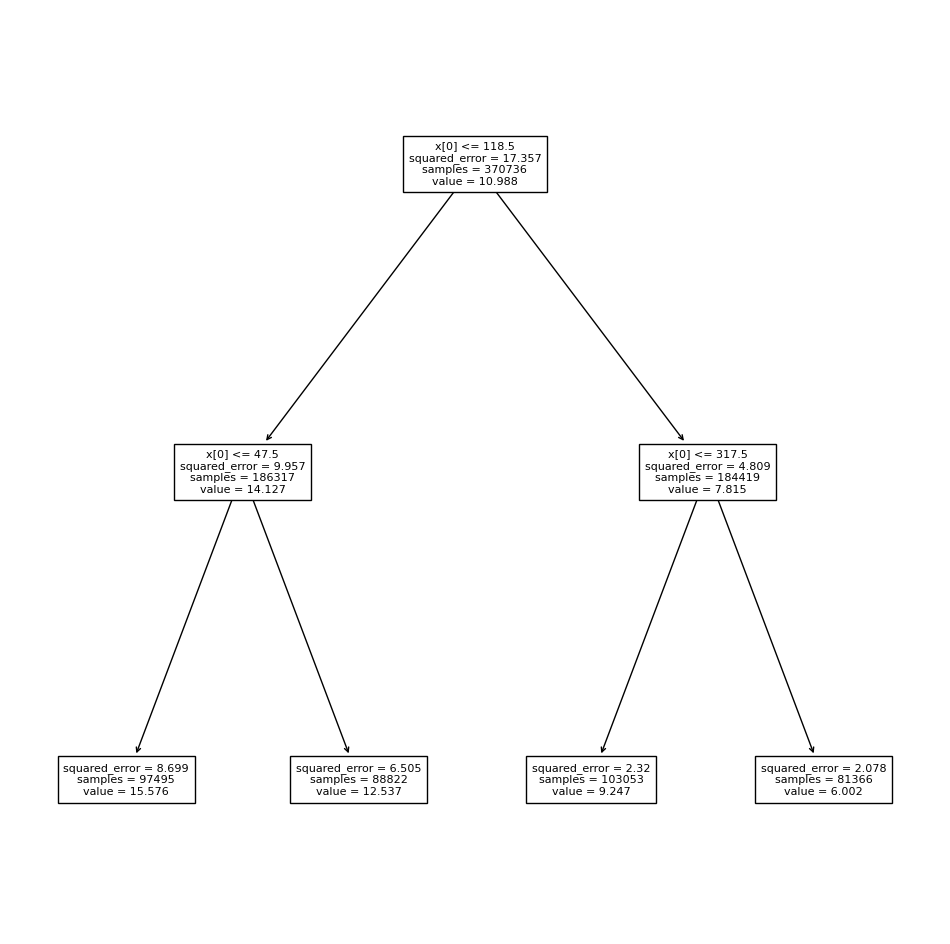

In [38]:
pres_clf = train_tree_and_plot(train_df, 'R_PRES', target_feature, 2)

In [39]:
splits = get_splits(pres_clf)
splits[0] = 0
splits

[0, 47.5, 118.5, 317.5, inf]

In [40]:
train_df, test_df = update_datasets_with_categories(train_df, test_df, 'R_PRES', splits)

(370736, 66) (158887, 66)
train and test cols: True
R_PRES_missing correctness (train):  True
R_PRES_missing correctness (test):  True


## Save the data

Also convert all boolean variables to int.

In [41]:
train_df.replace({False: 0, True: 1}, inplace=True)
test_df.replace({False: 0, True: 1}, inplace=True)

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370736 entries, 442244 to 320663
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_Depth                     370736 non-null  float64
 1   R_TEMP                      370736 non-null  float64
 2   R_SALINITY                  354846 non-null  float64
 3   R_SIGMA                     354843 non-null  float64
 4   R_SVA                       354846 non-null  float64
 5   R_DYNHT                     357438 non-null  float64
 6   R_O2                        281177 non-null  float64
 7   R_O2Sat                     272281 non-null  float64
 8   R_SIO3                      154269 non-null  float64
 9   R_PO4                       171446 non-null  float64
 10  R_NO3                       146157 non-null  float64
 11  R_NO2                       145988 non-null  float64
 12  R_NH4                       30339 non-null   float64
 13  R_CHLA        

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158887 entries, 404948 to 309268
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   R_Depth                     158887 non-null  float64
 1   R_TEMP                      158887 non-null  float64
 2   R_SALINITY                  152176 non-null  float64
 3   R_SIGMA                     152175 non-null  float64
 4   R_SVA                       152176 non-null  float64
 5   R_DYNHT                     153248 non-null  float64
 6   R_O2                        120683 non-null  float64
 7   R_O2Sat                     116875 non-null  float64
 8   R_SIO3                      66375 non-null   float64
 9   R_PO4                       73763 non-null   float64
 10  R_NO3                       62896 non-null   float64
 11  R_NO2                       62750 non-null   float64
 12  R_NH4                       13226 non-null   float64
 13  R_CHLA        

In [44]:
train_df.to_csv(f'../data/categorized_train.csv')
test_df.to_csv(f'../data/categorized_test.csv')